### Imports

In [238]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.datasets import make_blobs, make_moons
from sklearn.metrics import silhouette_score
import skfuzzy as fuzz

In [239]:
%matplotlib inline

In [240]:
def plot_clusters(X: np.ndarray, labels: np.ndarray, title: str) -> None:
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette="Set1", legend="full")
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

    return None

In [241]:
def compute_clusters(
    X: np.ndarray, model: object, model_name: str
) -> tuple[np.ndarray, float]:
    labels = model.fit_predict(X)
    silhouette_metric_avg = silhouette_score(X, labels)

    print(f"{model_name} Silhouette Score: {silhouette_metric_avg:.4f}")
    plot_clusters(X, labels, f"{model_name} Clustering")

    return labels, silhouette_metric_avg

### Data

In [242]:
RANDOM_STATE = 11
SAMPLE_SIZE = 1000

MOON_NOISE = 0.05

BLOB_CENTERS = 4
BLOB_STD = 0.60

np.random.seed(RANDOM_STATE)

In [243]:
X_moon, y_moon = make_moons(
    n_samples=SAMPLE_SIZE, noise=MOON_NOISE, random_state=RANDOM_STATE
)

X_blob, y_blob = make_blobs(
    n_samples=SAMPLE_SIZE,
    centers=BLOB_CENTERS,
    cluster_std=BLOB_STD,
    random_state=RANDOM_STATE,
)

In [244]:
df_moon = pd.DataFrame(X_moon, columns=["Feature 1", "Feature 2"])
df_moon["True Label"] = y_moon

df_blob = pd.DataFrame(X_blob, columns=["Feature 1", "Feature 2"])
df_blob["True Label"] = y_blob

In [245]:
df_moon.describe(include="all")

,Feature 1,Feature 2,True Label
count,1000.000000,1000.000000,1000.00000
mean,0.499308,0.251964,0.50000
std,0.866929,0.493952,0.50025
min,-1.094429,-0.599541,0.00000
25%,-0.046895,-0.190130,0.00000
50%,0.509096,0.256212,0.50000
75%,1.039389,0.700379,1.00000
max,2.093017,1.141255,1.00000


In [246]:
df_blob.describe(include="all")

,Feature 1,Feature 2,True Label
count,1000.000000,1000.000000,1000.000000
mean,-4.617200,-1.401600,1.500000
std,3.693565,5.178928,1.118593
min,-11.259865,-11.686665,0.000000
25%,-8.055277,-3.798195,0.750000
50%,-4.343308,-0.239293,1.500000
75%,-1.175268,1.606944,2.250000
max,0.880126,6.487488,3.000000


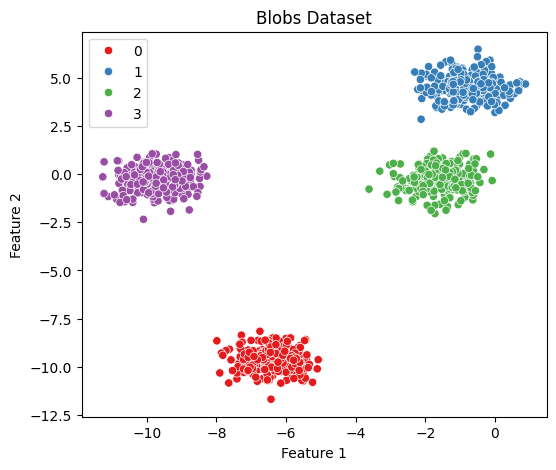

In [247]:
plot_clusters(X_blob, y_blob, "Blobs Dataset")

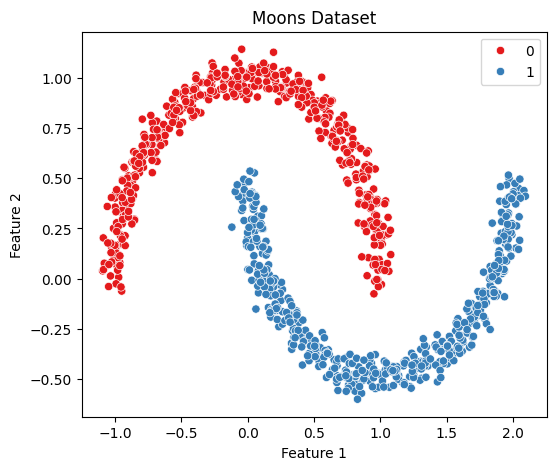

In [248]:
plot_clusters(X_moon, y_moon, "Moons Dataset")

### Clustering

#### Moon Data

KMeans on Moons Silhouette Score: 0.4917


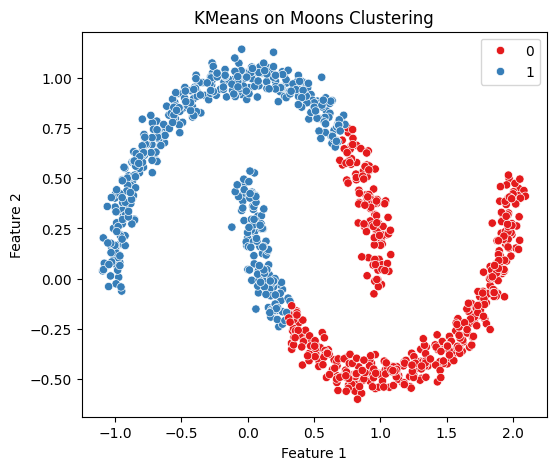

In [249]:
model = KMeans(n_clusters=2, random_state=RANDOM_STATE)
title = "KMeans on Moons"
labels, sil_kmeans = compute_clusters(X_moon, model, title)

Agglomerative Clustering on Moons Silhouette Score: 0.4137


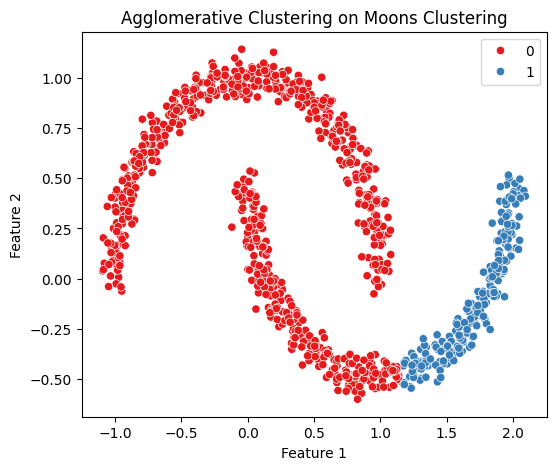

In [250]:
model = AgglomerativeClustering(n_clusters=2, linkage="ward")
title = "Agglomerative Clustering on Moons"
labels, sil_agg = compute_clusters(X_moon, model, title)

DBSCAN on Moons Silhouette Score: 0.3367


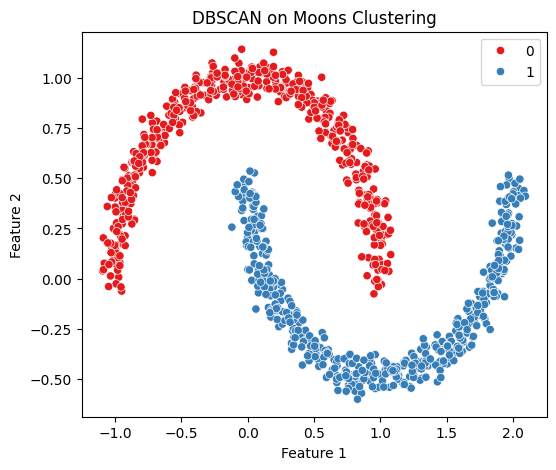

In [251]:
model = DBSCAN(eps=0.2, min_samples=5)
title = "DBSCAN on Moons"
labels, sil_dbscan = compute_clusters(X_moon, model, title)

Fuzzy c-Means Silhouette Score: 0.4907


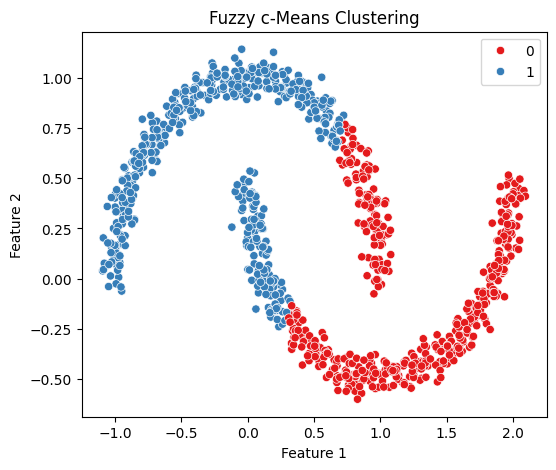

In [252]:
X_fuzzy = X_moon.T

cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X_fuzzy, c=2, m=2, error=0.005, maxiter=1000, init=None
)

labels_fcm = np.argmax(u, axis=0)

sil_fcm = silhouette_score(X_moon, labels_fcm)
print(f"Fuzzy c-Means Silhouette Score: {silhouette_fcm:.4f}")
plot_clusters(X_moon, labels_fcm, "Fuzzy c-Means Clustering")

In [253]:
print("\nSilhouette score comparison:")
print(f"k-Means: {sil_kmeans}")
print(f"Fuzzy c-Means: {sil_fcm}")
print(f"Agglomerative: {sil_agg}")
print(f"DBSCAN: {sil_dbscan}")


Silhouette score comparison:
k-Means: 0.49170327721652846
Fuzzy c-Means: 0.49151639383658097
Agglomerative: 0.41373726789508036
DBSCAN: 0.336667297622395


#### Blob Data

KMeans on Blobs Silhouette Score: 0.8287


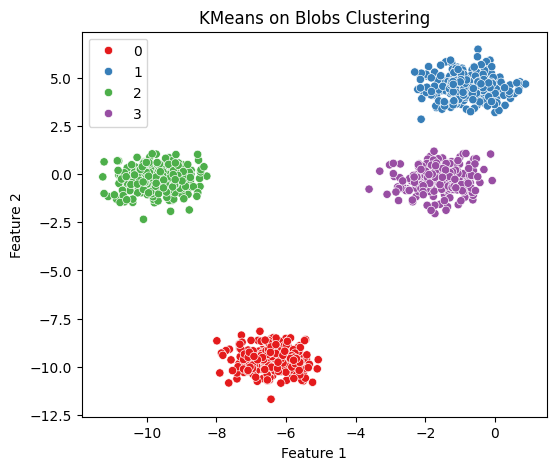

In [254]:
model = KMeans(n_clusters=4, random_state=RANDOM_STATE)
title = "KMeans on Blobs"
labels, sil_kmeans = compute_clusters(X_blob, model, title)

Agglomerative Clustering on Blobs Silhouette Score: 0.8287


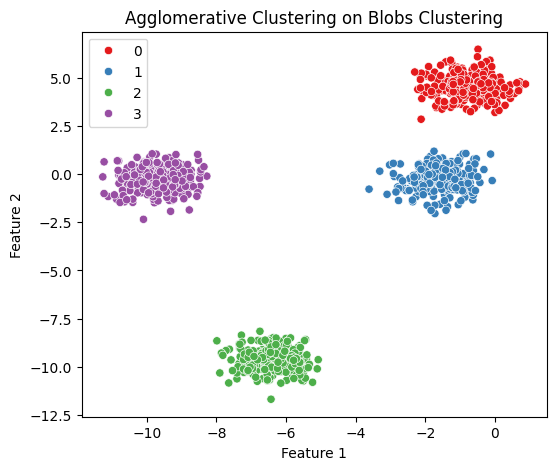

In [255]:
model = AgglomerativeClustering(n_clusters=4, linkage="ward")
title = "Agglomerative Clustering on Blobs"
labels, sil_agg = compute_clusters(X_blob, model, title)

DBSCAN on Blobs Silhouette Score: 0.7967


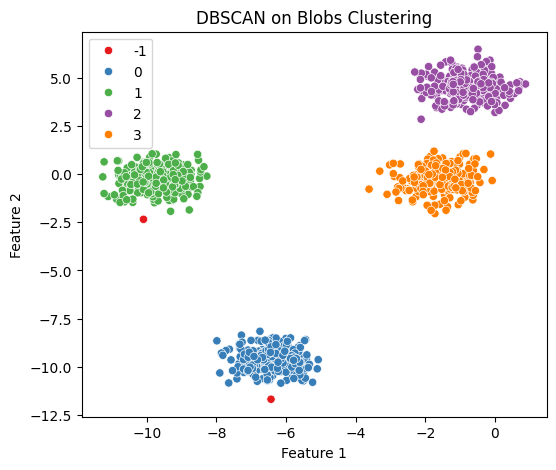

In [256]:
model = DBSCAN(eps=0.8, min_samples=5)
title = "DBSCAN on Blobs"
labels, sil_dbscan = compute_clusters(X_blob, model, title)

Fuzzy c-Means Silhouette Score: 0.4907


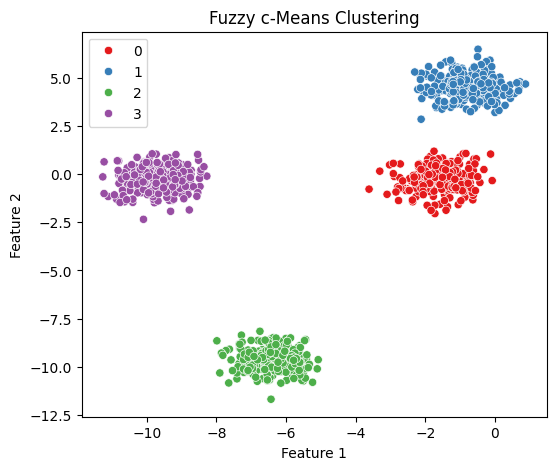

In [258]:
X_fuzzy = X_blob.T

cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X_fuzzy, c=4, m=2, error=0.005, maxiter=1000, init=None
)

labels_fcm = np.argmax(u, axis=0)

sil_fcm = silhouette_score(X_blob, labels_fcm)
print(f"Fuzzy c-Means Silhouette Score: {silhouette_fcm:.4f}")
plot_clusters(X_blob, labels_fcm, "Fuzzy c-Means Clustering")

In [259]:
print("\nSilhouette score comparison:")
print(f"k-Means: {sil_kmeans}")
print(f"Fuzzy c-Means: {sil_fcm}")
print(f"Agglomerative: {sil_agg}")
print(f"DBSCAN: {sil_dbscan}")


Silhouette score comparison:
k-Means: 0.8287381483125498
Fuzzy c-Means: 0.8287381483125498
Agglomerative: 0.8287381483125498
DBSCAN: 0.7966864639392826
